Import packages

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import k_means
import matplotlib.pyplot as plt

Generate some data

In [4]:
centers = [[1, 1], [-1, -1], [1, -1]]
data, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

data = StandardScaler().fit_transform(data) # make sure we have clusters that are of roughly equal size 

print(data) 
data.shape

[[ 0.49426097  1.45106697]
 [-1.42808099 -0.83706377]
 [ 0.33855918  1.03875871]
 ...
 [-0.05713876 -0.90926105]
 [-1.16939407  0.03959692]
 [ 0.26322951 -0.92649949]]


(750, 2)

Make a plot of the data

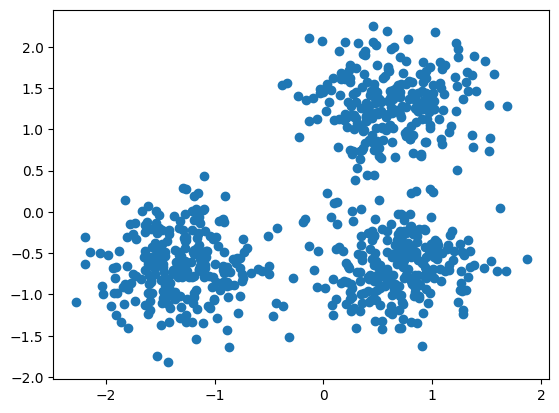

In [5]:
fig,ax = plt.subplots()
ax.scatter(data[:,0], data[:,1])
plt.show()

Draw three random points from the data to initialize the centroids using the random package, plot them in red

[[ 0.91961496 -1.22049235]
 [-1.87656067 -0.47611637]
 [-0.12897596  1.09716295]]


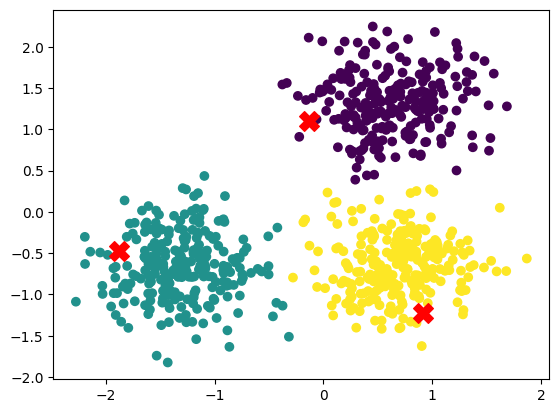

In [11]:
import random

k = 3  # number of clusters
#kmeans = k_means(data, n_clusters=k, random_state=0)
#labels = kmeans[1]
#centroids = kmeans[0]

indices = random.sample(range(data.shape[0]), k)
centroids = data[indices, :]
print(centroids)
fig,ax = plt.subplots()
ax.scatter(data[:,0], data[:,1], c=labels)
ax.scatter(centroids[:,0], centroids[:,1], c='red', marker='X', s=200)
plt.show()  


First, write a function to calculate the euclidean distance between two points. In a loop, run through the rows of data, selecting one row each. In the second inner loop, calculate the distance of the point defined by that row from the three centroids.

[[2.7052089  3.05529554 0.71670937]
 [2.37880091 0.57568832 2.33000148]
 [2.33277543 2.68358016 0.47116893]
 ...
 [1.02514036 1.87027014 2.00770961]
 [2.43962778 0.87523985 1.48354837]
 [0.7192174  2.18667487 2.06131871]]


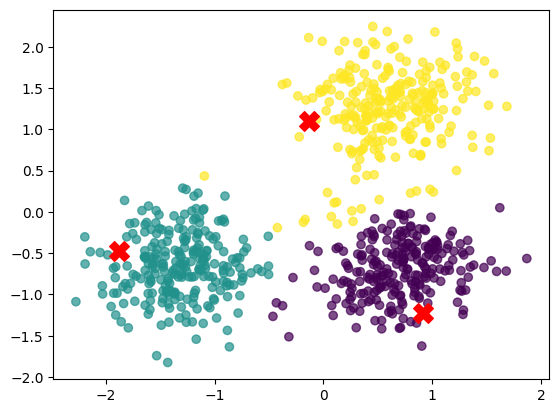

In [14]:
#calculate euclidean distance
def euclid_dist(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))


#loop through data points and centroids to calculate distances
distances = np.zeros((data.shape[0], k))
for i in range(data.shape[0]):
    for j in range(k):
        distances[i, j] = euclid_dist(data[i], centroids[j])

print(distances)

#assign clusters based on minimum distance
labels = np.argmin(distances, axis=1)
fig,ax = plt.subplots()
ax.scatter(data[:,0], data[:,1], c=labels, cmap='viridis', alpha=0.7)
ax.scatter(centroids[:,0], centroids[:,1], c='red', marker='X', s=200)
plt.show()  


Putting it all together

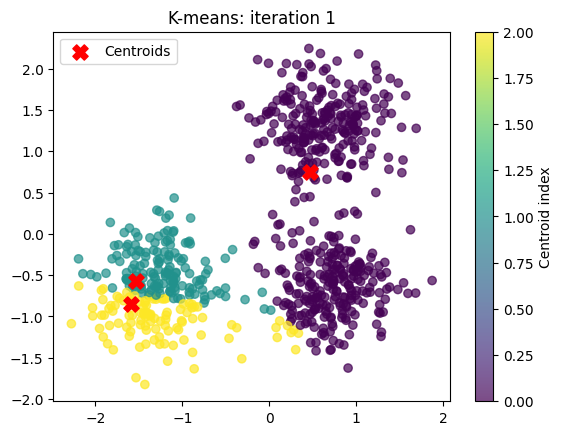

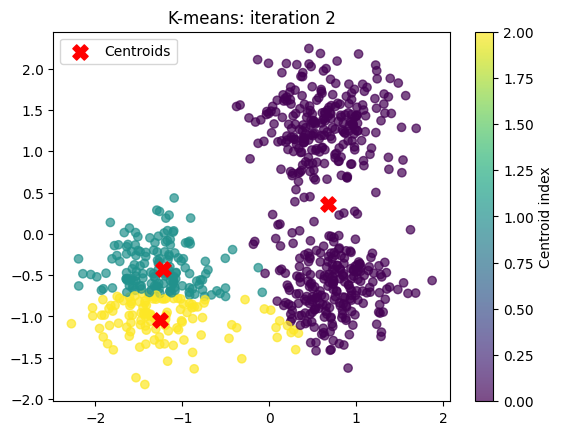

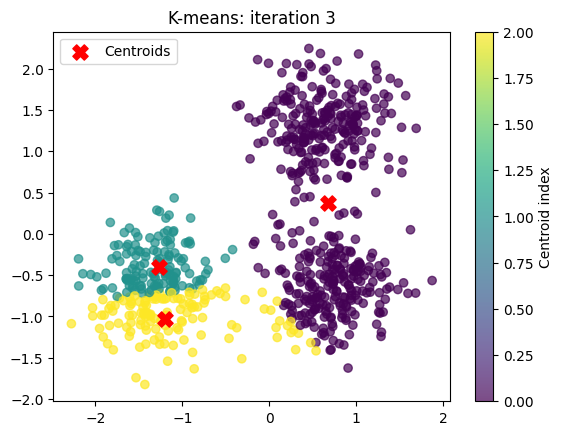

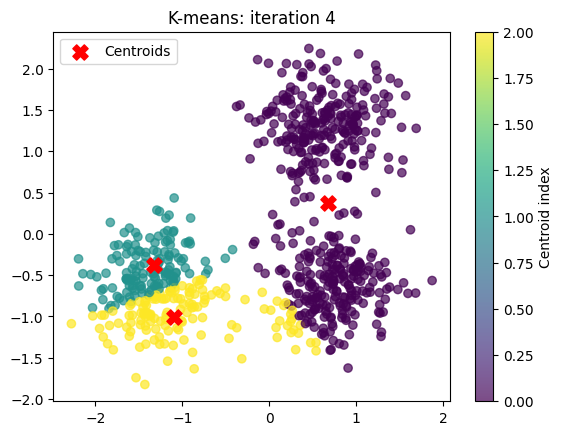

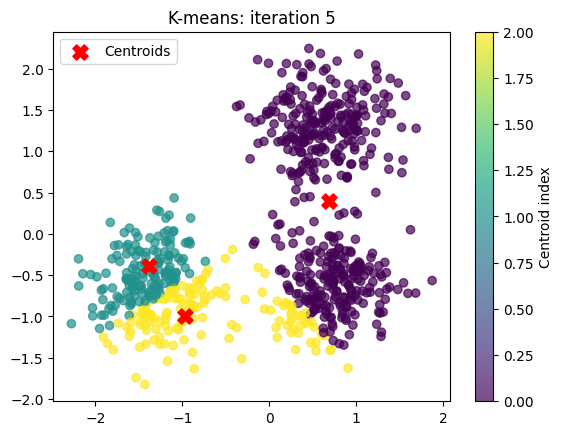

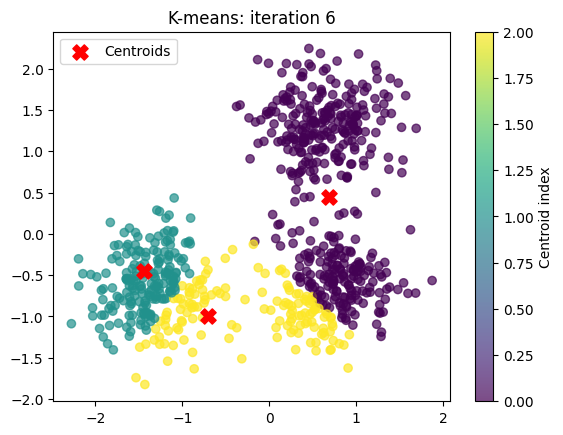

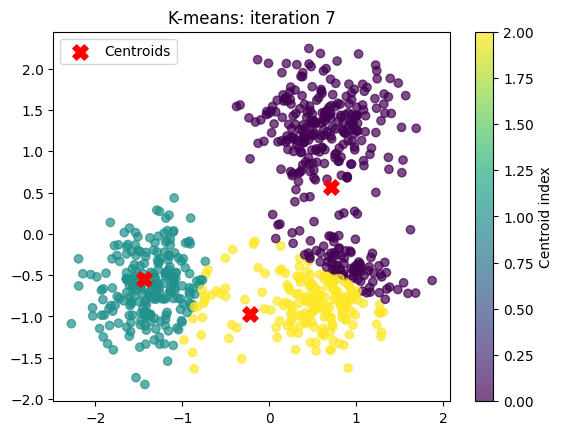

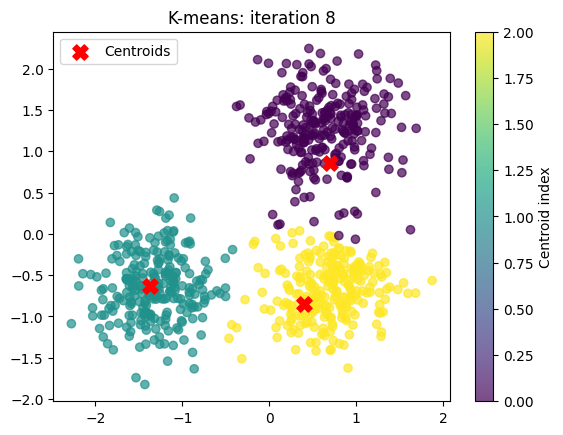

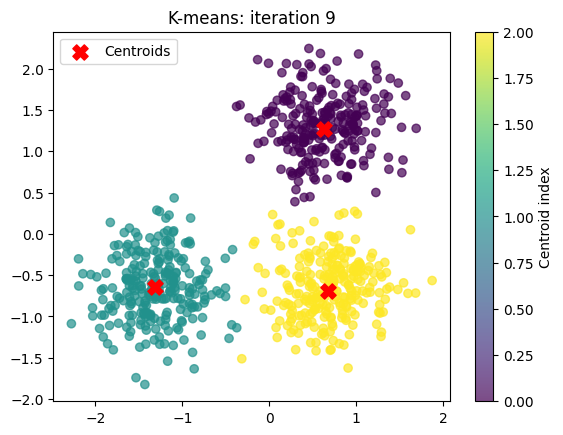

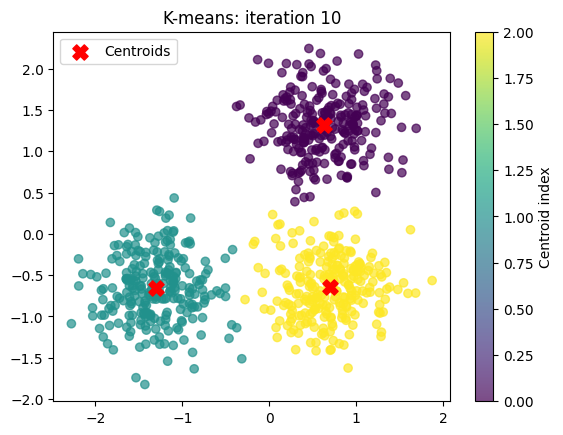

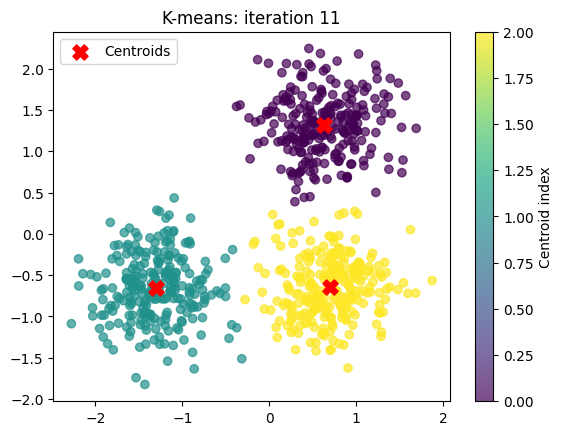

Converged after 11 iteration(s).
Finished after 11 iteration(s).
Final centroids:
 [[ 0.62260555  1.3172598 ]
 [-1.30266211 -0.65704205]
 [ 0.6954587  -0.64442334]]


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random

# --- Settings ---
k = 3
max_iters = 15  # Keep small for now

# --- Use only x,y coordinates (keep it simple) ---
X = data[:, :2]  # if data has 2 cols already, this is identical
n = X.shape[0]

# --- 1) Initialize centroids by sampling rows from data ---
indices = random.sample(range(n), k)
centroids = X[indices, :].copy()

# --- Distance function (your version) ---
def calculate_euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Plot helper
def plot_clusters(X, labels, centroids, i):
    fig, ax = plt.subplots()
    scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
    ax.scatter(centroids[:, 0], centroids[:, 1], color='red', s=120, marker='X', label='Centroids')
    ax.set_title(f"K-means: iteration {i+1}")
    ax.legend()
    plt.colorbar(scatter, ax=ax, label="Centroid index")
    plt.show()

# --- 2) Iterate: assign -> update -> plot ---
for it in range(max_iters):
    # Assign each point to nearest centroid (your nested-loop style)
    closest_index = []
    for j, row in enumerate(X):
        distances = [calculate_euclidean_distance(row, c) for c in centroids]
        closest_index.append(int(np.argmin(distances)))
    closest_index = np.array(closest_index, dtype=int)

    # Plot current state
    plot_clusters(X, closest_index, centroids, it)

    # Update centroids
    new_centroids = []
    for i in range(k):
        cluster_points = X[closest_index == i]
        if cluster_points.size > 0:
            centroid = cluster_points.mean(axis=0)
        else:
            # reinit empty cluster to a random point
            centroid = X[random.randrange(n)]
        new_centroids.append(centroid)
    new_centroids = np.array(new_centroids)

    # Stop if nothing changes
    if np.allclose(new_centroids, centroids):
        print(f"Converged after {it+1} iteration(s).")
        break

    centroids = new_centroids

print(f"Finished after {it+1} iteration(s).")
print("Final centroids:\n", centroids)